In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [308]:
dataset = pd.read_csv("/Users/basildanielvarghese/Downloads/bank-full.csv",sep=";")

In [309]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [310]:
dataset.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [311]:
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [312]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [313]:
dataset.shape

(45211, 17)

In [314]:
dataset['y'].value_counts()/dataset.shape[0]

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [315]:
dataset['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

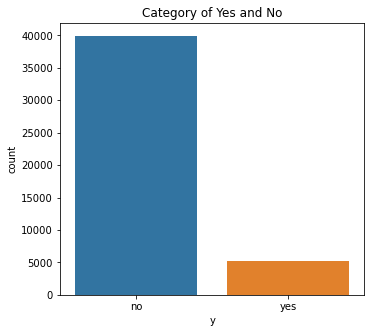

In [316]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=dataset)
plt.title("Category of Yes and No")
plt.show()

In [317]:
df_cat = dataset.select_dtypes(include='object').columns.drop(["y","job"])
df_cat

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

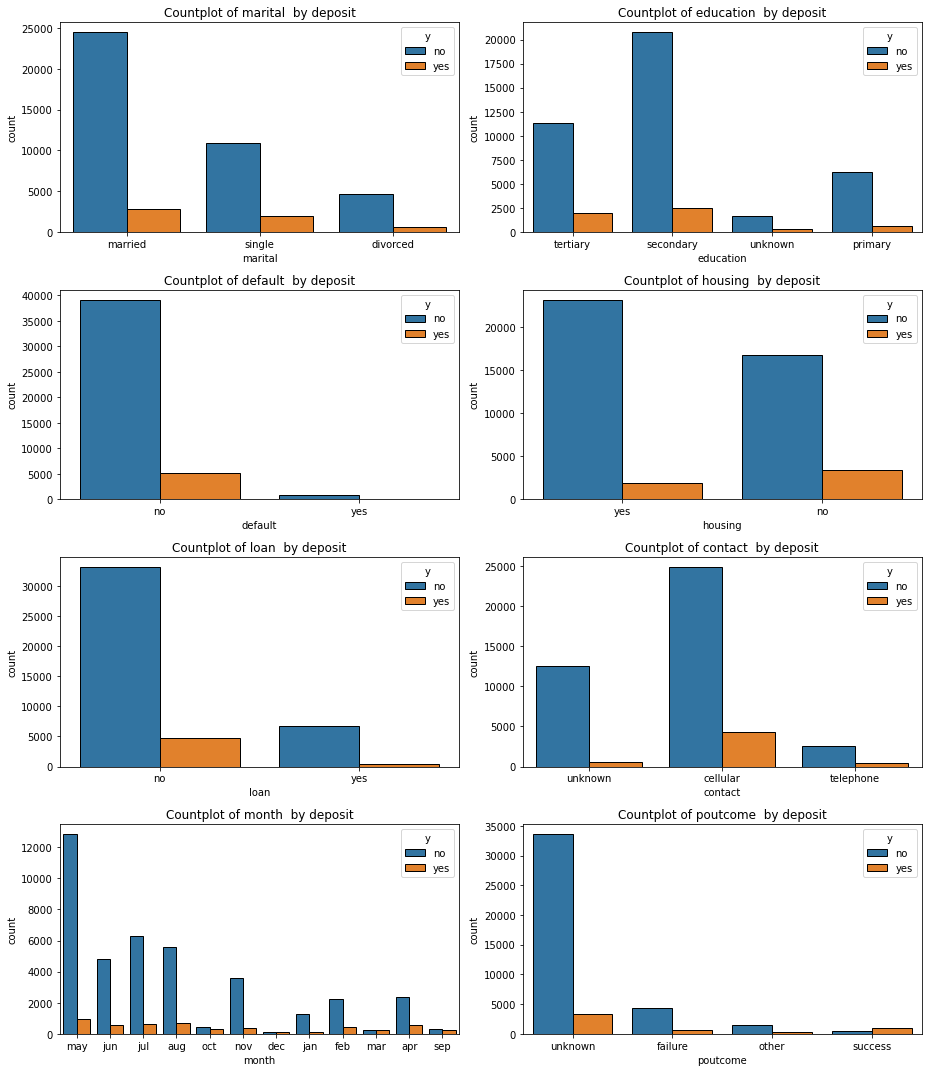

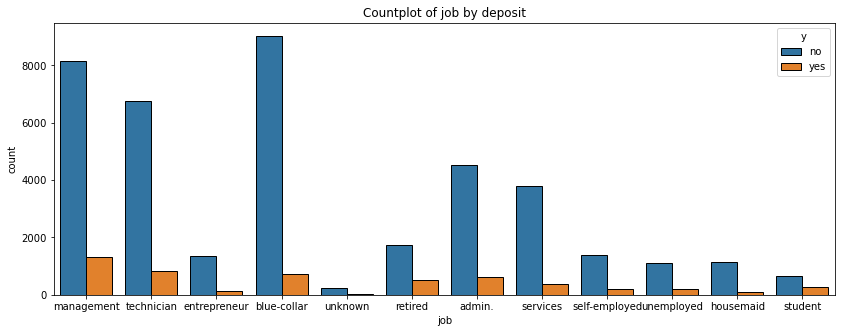

In [318]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(df_cat):
    plt.subplot(4,2,i+1)
    sns.countplot(x=cat_fea,hue='y',data=dataset,edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout()    
plt.show()
plt.figure(figsize=[14,5])
sns.countplot(x='job', hue='y',edgecolor="black",data=dataset)
plt.title("Countplot of job by deposit")
plt.show()

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


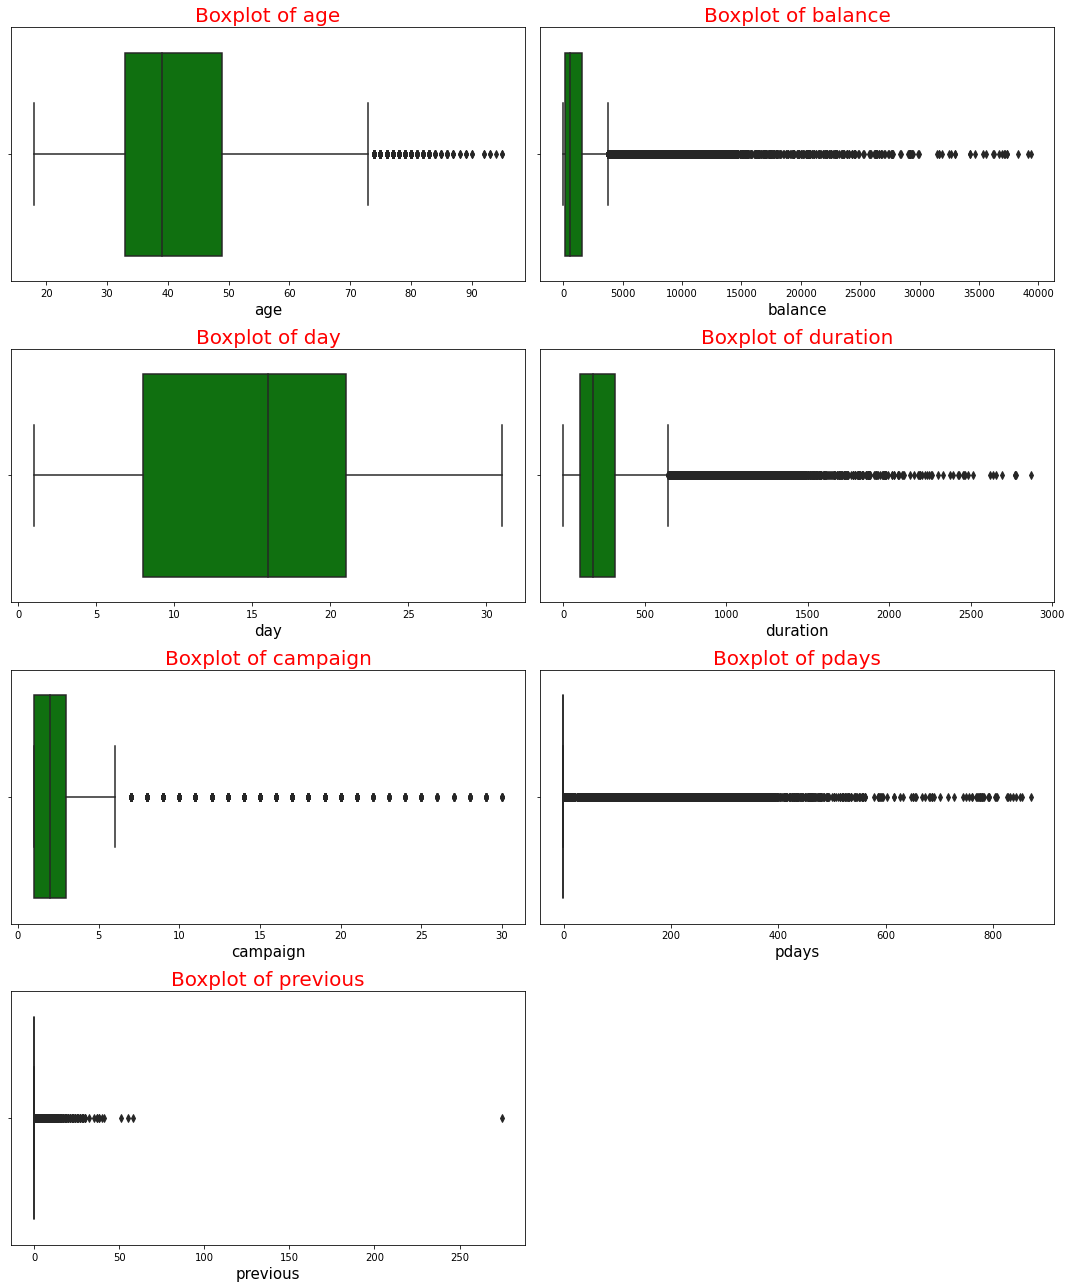

In [340]:
df_num = dataset[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=df_num,color='green')
    plt.title("Boxplot of {}".format(v),size=20,color="red")
    plt.xlabel("{}".format(v),size=15)
plt.tight_layout()
plt.show()

In [320]:
dataset.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [321]:
dataset[(dataset['balance']>40000)|(dataset['balance']<0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


In [322]:
dataset.drop(dataset[(dataset['balance']>40000)|(dataset['balance']<0)].index,inplace=True,axis=0)

In [323]:
dataset[dataset['duration']>3000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2386,45,blue-collar,married,secondary,no,66,yes,no,unknown,13,may,3366,3,-1,0,unknown,no
4382,34,blue-collar,married,primary,no,183,yes,no,unknown,19,may,3078,4,-1,0,unknown,no
6451,44,services,divorced,secondary,no,51,yes,yes,unknown,27,may,3094,2,-1,0,unknown,yes
9947,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
19639,37,blue-collar,married,tertiary,no,359,no,yes,cellular,7,aug,3422,2,-1,0,unknown,no
21113,43,self-employed,married,tertiary,no,423,no,no,cellular,14,aug,3322,2,-1,0,unknown,no
24095,30,admin.,married,secondary,no,1310,no,no,telephone,27,oct,3284,1,-1,0,unknown,no
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,no
28872,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,no
30747,53,admin.,married,secondary,no,849,yes,no,cellular,6,feb,3102,3,-1,0,unknown,yes


In [324]:
dataset.drop(dataset[dataset['duration']>3000].index,inplace=True,axis=0)

In [325]:
dataset[dataset['campaign']>40]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4299,30,management,single,tertiary,no,358,yes,no,unknown,19,may,88,51,-1,0,unknown,no
4330,45,management,married,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no
4334,42,blue-collar,married,primary,no,170,yes,no,unknown,19,may,51,41,-1,0,unknown,no
5073,35,technician,married,secondary,no,432,yes,no,unknown,21,may,1094,55,-1,0,unknown,no
5459,35,blue-collar,married,secondary,no,430,yes,no,unknown,23,may,147,50,-1,0,unknown,no
10697,28,blue-collar,single,secondary,no,235,yes,no,unknown,16,jun,102,46,-1,0,unknown,no
11301,28,blue-collar,single,secondary,no,623,no,no,unknown,18,jun,25,41,-1,0,unknown,no
11914,24,technician,single,primary,no,126,yes,no,unknown,20,jun,10,58,-1,0,unknown,no
13675,51,blue-collar,married,unknown,no,41,yes,no,telephone,9,jul,16,43,-1,0,unknown,no
18660,33,blue-collar,married,secondary,no,0,yes,yes,cellular,31,jul,16,43,-1,0,unknown,no


In [326]:
dataset.drop(dataset[dataset['campaign']>30].index,axis=0,inplace=True)

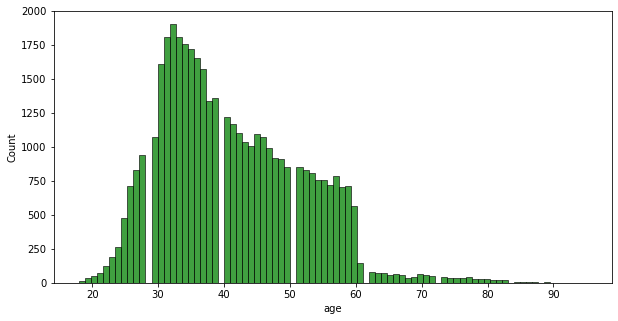

In [327]:
plt.figure(figsize=(10,5))
sns.histplot(x=dataset.age, color='green')
plt.show()

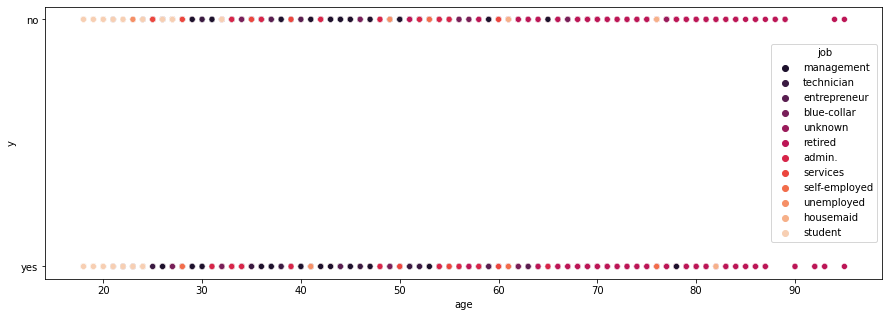

In [328]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=dataset.age, y=dataset.y, hue=dataset["job"], palette='rocket')
plt.show()

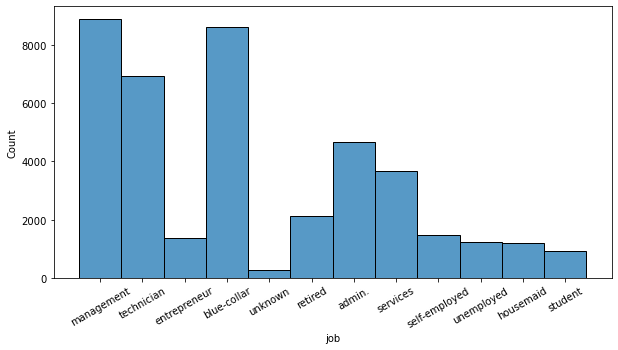

In [329]:
plt.figure(figsize=(10,5))
sns.histplot(x=dataset.job, palette="rocket")
plt.xticks(rotation=30)
plt.show()

In [330]:
dataset['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

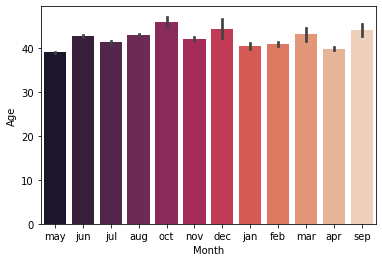

In [331]:
sns.barplot(x=dataset.month,y=dataset.age, palette="rocket")
plt.xlabel("Month")
plt.ylabel("Age")
plt.show()

In [332]:
X = dataset.drop('y',axis=1)
y = dataset['y']
X= pd.get_dummies(X,drop_first=True).values
y=y.replace(['yes','no'],[1,0]).values

In [333]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [334]:
X_test

array([[  28, 1348,    6, ...,    0,    0,    1],
       [  39, 1457,   20, ...,    0,    0,    1],
       [  35,  243,   12, ...,    0,    0,    1],
       ...,
       [  34, 4859,   30, ...,    1,    0,    0],
       [  44,    1,    2, ...,    0,    0,    1],
       [  48,    0,   26, ...,    0,    0,    1]])

In [341]:
lr= LogisticRegression()

lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)

print("Testing Accuracy of LogisticRegression : ",metrics.accuracy_score(y_test,Y_pred))
print("Training Accuracy of LogisticRegression : ",lr.score(X_train,y_train))

Testing Accuracy of LogisticRegression :  0.8800773694390716
Training Accuracy of LogisticRegression :  0.8878645912044734


In [342]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train,y_train)
Y_pred = rf.predict(X_test)

print("Testing Accuracy of RF : ",metrics.accuracy_score(y_test,Y_pred))
#print("Accuracy of LogisticRegression",pipe_lr.score(X_test,Y_test))

print("Training Accuracy of RF : ",rf.score(X_train,y_train))

Testing Accuracy of RF :  0.8986943907156673
Training Accuracy of RF :  1.0


In [343]:
knn= KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
Y_pred = knn.predict(X_test)

print("Testing Accuracy of KNN : ",metrics.accuracy_score(y_test,Y_pred))
#print("Accuracy of LogisticRegression",pipe_lr.score(X_test,Y_test))

print("Training Accuracy of KNN : ",knn.score(X_train,y_train))

Testing Accuracy of KNN :  0.8704061895551257
Training Accuracy of KNN :  0.9070878041408493
